# Advances in Land Use and Land Cover Segmentation: A Meta-Analytic Review of Artificial Intelligence-Based Models
- Autor: Matheus Martins Batista
- Professor: Adler Diniz de Souza
- Course: Engenharia de Software Experimental - PCO004

## Objective

Evaluate the performance of machine learning and deep learning models applied to semantic segmentation of land use and land cover in agricultural contexts. Specifically, synthesize quantitative performance metrics such as F1-score, accuracy, precision, recall, and kappa reported in empirical studies, as well as analyze how factors such as model architecture, input data type (e.g., satellite, UAV, multispectral, hyperspectral), and validation methods influence segmentation results. The review also aims to identify methodological trends, assess consistency in reporting practices, and highlight the main challenges and limitations in applying AI-based segmentation techniques to agricultural mapping.

## Research Questions

1. What performance metrics are reported for machine learning and deep learning models applied to semantic segmentation of agricultural land use and land cover?
2. How does the choice of model architecture (DL) and input data type (e.g., satellite, UAV, multispectral) influence segmentation performance?
3. Which methodological trends and approaches are most frequently used in recent agricultural semantic segmentation studies?
4. What are the main challenges and limitations reported by studies applying AI-based segmentation to agricultural land use and land cover?

## Search String

```
(("land use" OR "land cover" OR "agricultural area" OR "environmental zone") AND
 ("semantic segmentation") AND
 ("machine learning" OR "deep learning" OR "artificial intelligence") AND
 ("satellite imagery" OR "UAV imagery" OR "remote sensing" OR "Earth observation") AND
 ("agriculture") AND
 ("accuracy" OR "F1-score" OR "precision" OR "recall" OR "kappa"))
```

## Inclusion Criteria

| Criterion | Description                                                                                                                |
| --------- | -------------------------------------------------------------------------------------------------------------------------- |
| IC-1      | Applies semantic segmentation or object-based classification for land-use and land-cover mapping in agricultural contexts. |
| IC-2      | Employs artificial intelligence, machine learning, or deep-learning methods.                                               |
| IC-3      | Reports quantitative performance metrics such as F1-score, accuracy, precision, or recall.                                 |
| IC-4      | Uses geospatial data such as satellite images, UAV imagery, multispectral, hyperspectral, or LiDAR sensors.                |

## Exclusion Criteria

| Criterion | Description                                                                |
| --------- | -------------------------------------------------------------------------- |
| EC-1      | The study does not focus on agriculture.                                   |
| EC-2      | Review, opinion, editorial, or other source lacking primary data.          |
| EC-3      | Full text is not available.                                                |
| EC-4      | The test or validation sample size is not reported and cannot be inferred. |
| EC-5      | The study language is not English, Portuguese, or Spanish.                 |


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def save_plot_pdf(file_name: str, folder: str = "assets") -> None:
    os.makedirs(folder, exist_ok=True)                     # ensure folder exists
    full_path = os.path.join(folder, f"{file_name}.pdf")
    plt.savefig(full_path, format="pdf", bbox_inches="tight")
    print(f"Plot saved to: {full_path}")

Plot saved to: assets/study_distribution_by_year.pdf


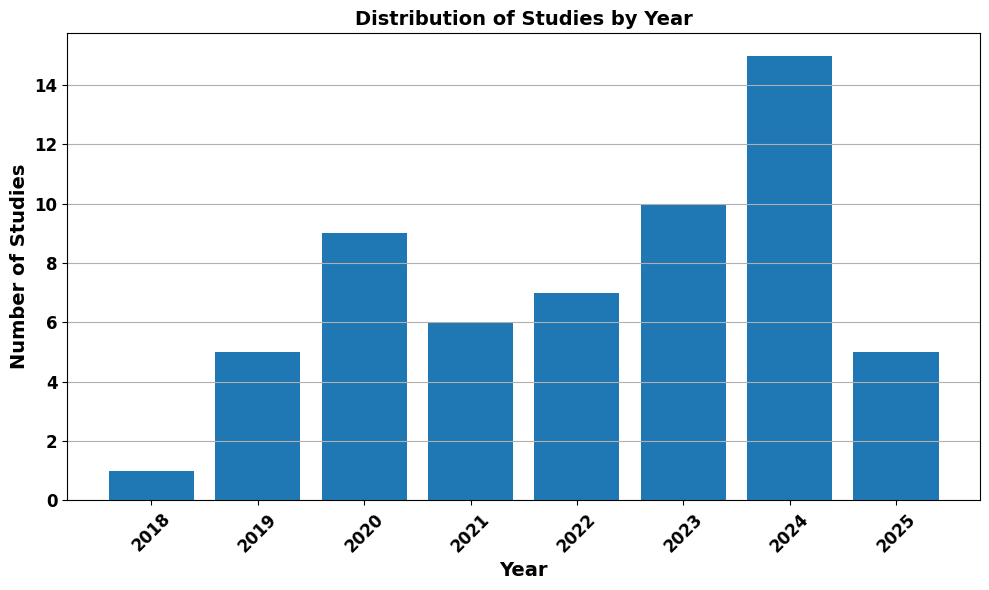

In [17]:
# Load spreadsheet
minimal_path = "../sheets/articles_year.xlsx"
df = pd.read_excel(minimal_path, sheet_name="articles")

# Keep only relevant columns
df_minimal = df[["author", "title", "year"]]

# (Optional) Save new sheet
df_minimal.to_excel("articles_minimal.xlsx", index=False)

# Count studies per year
year_counts = df_minimal["year"].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index.astype(str), year_counts.values) #type: ignore
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Number of Studies", fontsize=14, fontweight='bold')
plt.title("Distribution of Studies by Year", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y')
plt.tight_layout()

save_plot_pdf("study_distribution_by_year")

plt.show()

Plot saved to: assets/heatmap_arms_per_study.pdf


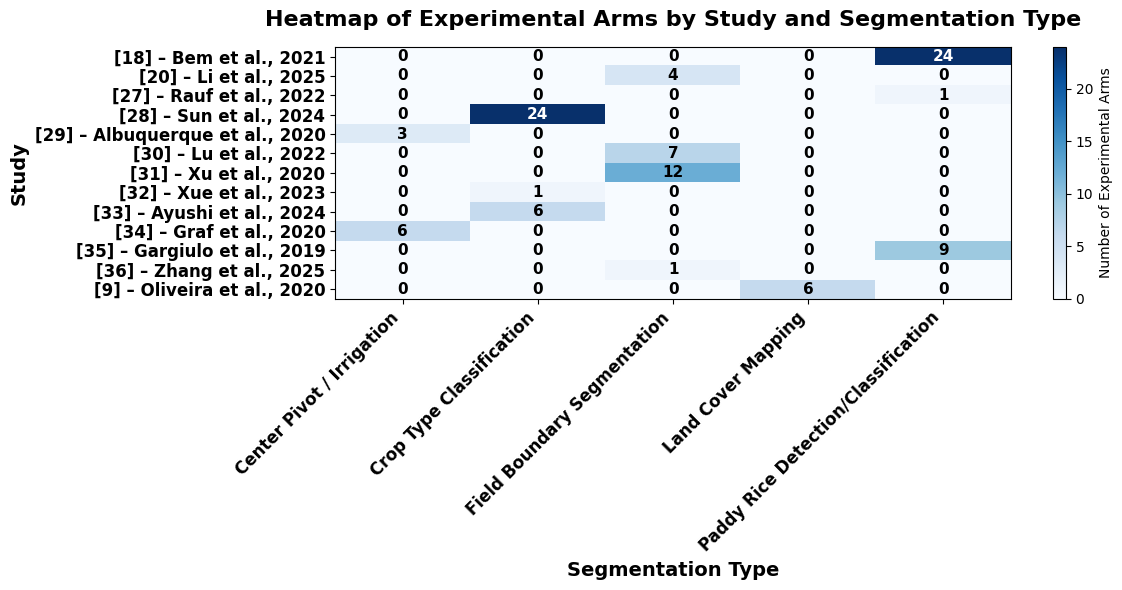

In [18]:
FILE_PATH  = "../sheets/meta_analysis_v4.xlsx"
SHEET_NAME = "geral"

# Reverse translation: keep original English labels if present
pt_to_en = {
    "Irrigação por Pivô Central"            : "Center Pivot / Irrigation",
    "Classificação de Tipo de Cultura"      : "Crop Type Classification",
    "Segmentação de Limites de Talhão"      : "Field Boundary Segmentation",
    "Mapeamento de Cobertura do Solo"       : "Land Cover Mapping",
    "Detecção/Classificação de Arroz Irrigado": "Paddy Rice Detection/Classification",
}

# ── Load & prepare data
df = pd.read_excel(FILE_PATH, sheet_name=SHEET_NAME)
df["Segmentation type (en)"] = (
    df["Segmentation type"].replace(pt_to_en).fillna(df["Segmentation type"])
)

df["Study Label"] = df["Study Number"].astype(str).str.rjust(2, "0") + " – " + df["Study ID"]

count_table = (
    df.groupby(["Study Label", "Segmentation type (en)"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# ── Heatmap
fig_height = max(6, 0.35 * len(count_table))
fig, ax = plt.subplots(figsize=(12, fig_height))

data = count_table.values
im = ax.imshow(data, aspect="auto", cmap="Blues")

ax.set_xticks(range(len(count_table.columns)))
ax.set_xticklabels(count_table.columns, rotation=45, ha="right", fontsize=12, fontweight="bold")
ax.set_yticks(range(len(count_table.index)))
ax.set_yticklabels(count_table.index, fontsize=12, fontweight="bold")

plt.colorbar(im, ax=ax, label="Number of Experimental Arms")

threshold = data.max() / 2 if data.max() else 0 #type: ignore
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        color = "white" if val > threshold else "black"
        ax.text(j, i, f"{val}", ha="center", va="center", color=color, fontsize=11, fontweight="bold")

ax.set_title("Heatmap of Experimental Arms by Study and Segmentation Type", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Segmentation Type", fontsize=14, fontweight="bold")
ax.set_ylabel("Study", fontsize=14, fontweight="bold")

plt.tight_layout()
save_plot_pdf("heatmap_arms_per_study")
plt.show()

Plot saved to: assets/heatmap_arms_by_study_architecture.pdf


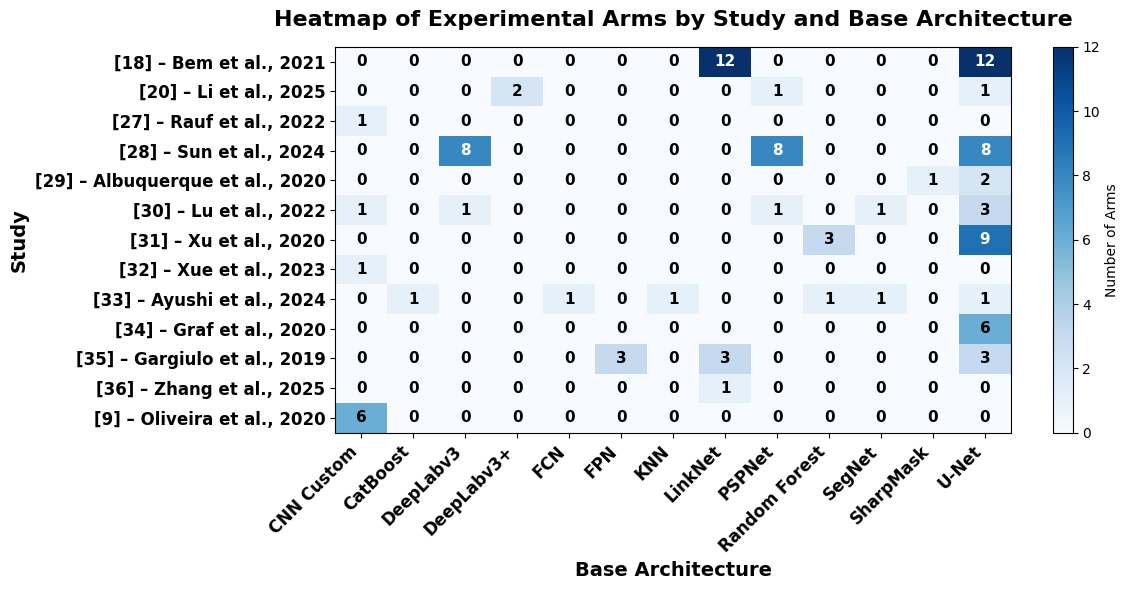

In [19]:
# Required columns
required_cols = {"Study ID", "Study Number", "Architecture (base)"}
missing = required_cols - set(df.columns)
assert not missing, f"Missing columns: {missing}"

# Build label “01 – Li2025”, etc.
df["Study Label"] = df["Study Number"].astype(str).str.rjust(2, "0") + " – " + df["Study ID"]

# Count experimental arms per study and architecture
count_table = (
    df.groupby(["Study Label", "Architecture (base)"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# ── Heatmap
fig_height = max(6, 0.35 * len(count_table))
fig, ax = plt.subplots(figsize=(12, fig_height))

data = count_table.values
im = ax.imshow(data, aspect="auto", cmap="Blues")

# Ticks
ax.set_xticks(range(len(count_table.columns)))
ax.set_xticklabels(count_table.columns, rotation=45, ha="right",
                   fontsize=12, fontweight="bold")
ax.set_yticks(range(len(count_table.index)))
ax.set_yticklabels(count_table.index, fontsize=12, fontweight="bold")

# Color bar
plt.colorbar(im, ax=ax, label="Number of Arms")

# Cell annotations
thr = data.max() / 2 if data.max() else 0 #type: ignore
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        color = "white" if val > thr else "black"
        ax.text(j, i, f"{val}", ha="center", va="center",
                color=color, fontsize=11, fontweight="bold")

# Titles and labels
ax.set_title("Heatmap of Experimental Arms by Study and Base Architecture",
             fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Base Architecture", fontsize=14, fontweight="bold")
ax.set_ylabel("Study", fontsize=14, fontweight="bold")

plt.tight_layout()
save_plot_pdf("heatmap_arms_by_study_architecture")
plt.show()


/tmp/ipykernel_22706/1422177024.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Study Label", "validation_category"])


Plot saved to: assets/heatmap_arms_by_study_validation.pdf


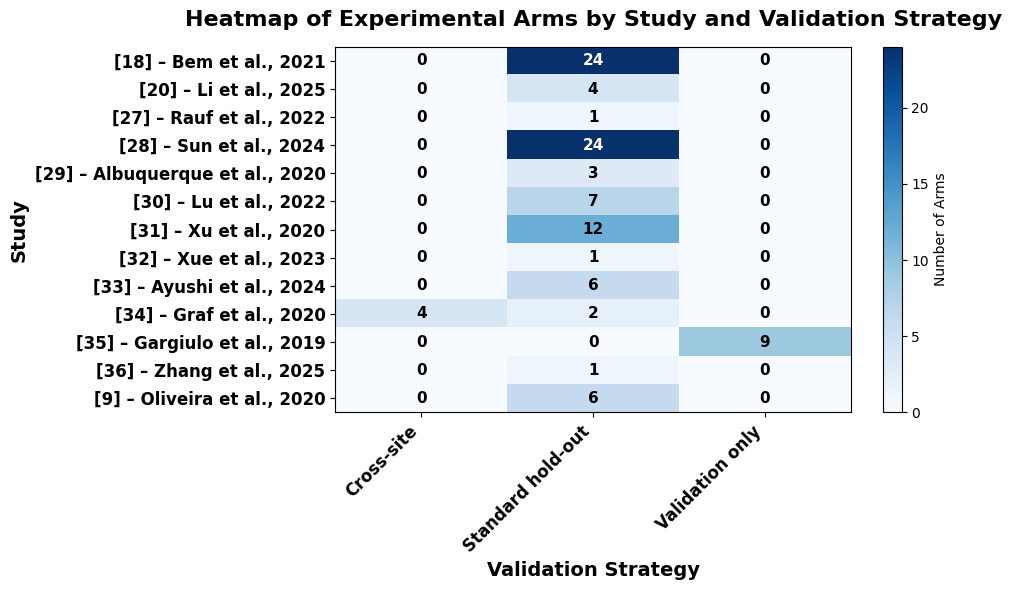

In [20]:
# Check for required columns
required_cols = {"Study ID", "Study Number", "validation_category"}
missing = required_cols - set(df.columns)
assert not missing, f"Missing columns: {missing}"

cat_map = {
    "Cross-site / externo": "Cross-site",
    "Hold-out clássico":    "Standard hold-out",
    "Validação apenas":     "Validation only",
}

df["validation_category"] = (
    df["validation_category"]
      .replace(cat_map)                              
      .fillna(df["validation_category"])
)

# enforce a consistent column order in the heat map
cat_order = ["Cross-site", "Standard hold-out", "Validation only"]
df["validation_category"] = pd.Categorical(
    df["validation_category"], categories=cat_order, ordered=True
)

df["Study Label"] = (
    df["Study Number"].astype(str).str.rjust(2, "0") + " – " + df["Study ID"]
)

count_table = (
    df.groupby(["Study Label", "validation_category"])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=cat_order, fill_value=0)       # guarantee column order
      .sort_index()
)

fig_height = max(6, 0.35 * len(count_table))
fig, ax = plt.subplots(figsize=(10, fig_height))

data = count_table.values
im = ax.imshow(data, aspect="auto", cmap="Blues")

# Axis ticks
ax.set_xticks(range(len(count_table.columns)))
ax.set_xticklabels(count_table.columns, rotation=45, ha="right",
                   fontsize=12, fontweight="bold")
ax.set_yticks(range(len(count_table.index)))
ax.set_yticklabels(count_table.index, fontsize=12, fontweight="bold")

# Cell annotations
threshold = data.max() / 2.0 if data.max() else 0
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        color = "white" if val > threshold else "black"
        ax.text(j, i, f"{val}", ha="center", va="center",
                color=color, fontsize=11, fontweight="bold")

# Color bar
plt.colorbar(im, ax=ax, label="Number of Arms")

# Titles and labels
ax.set_title("Heatmap of Experimental Arms by Study and Validation Strategy",
             fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Validation Strategy", fontsize=14, fontweight="bold")
ax.set_ylabel("Study", fontsize=14, fontweight="bold")

plt.tight_layout()
save_plot_pdf("heatmap_arms_by_study_validation")
plt.show()

Plot saved to: assets/heatmap_architecture_segmentation_studies.pdf


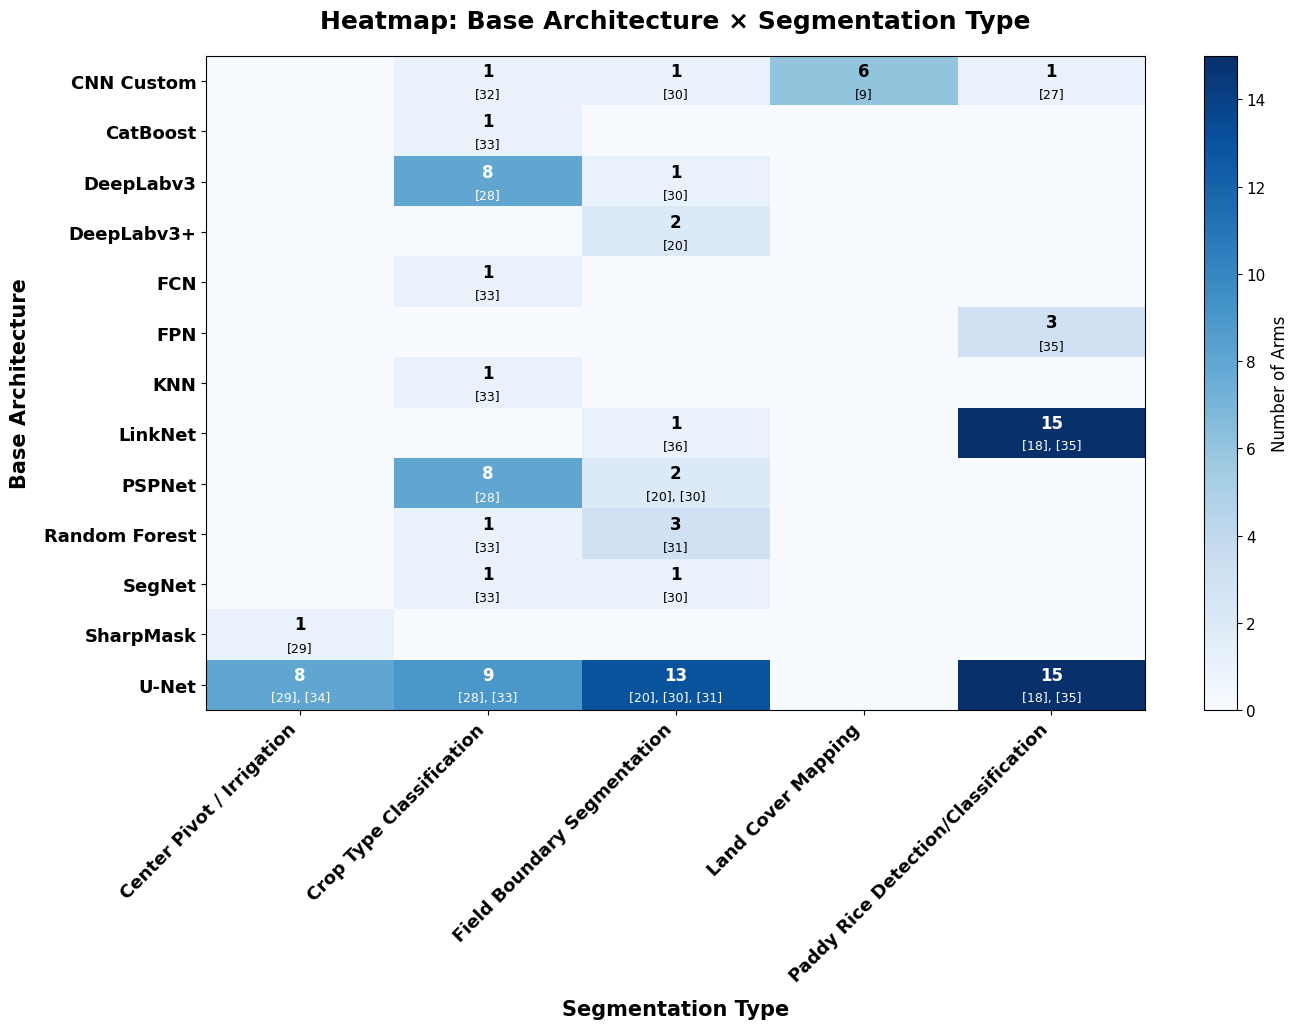

In [21]:
# Filter required columns
required_cols = ["Architecture (base)", "Segmentation type", "Study Number"]
df_filtered = df[required_cols].dropna()

# Group study numbers by (Architecture, Segmentation Type) pair
grouped = (
    df_filtered.groupby(["Architecture (base)", "Segmentation type"])["Study Number"]
    .apply(lambda x: ', '.join(map(str, sorted(x.unique()))))
    .unstack(fill_value="")
    .sort_index()
)

# Count table
counts = (
    df_filtered.groupby(["Architecture (base)", "Segmentation type"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Plot heatmap with study numbers annotated
fig_height = max(8, 0.8 * len(counts))
fig, ax = plt.subplots(figsize=(14, fig_height))

im = ax.imshow(counts.values, aspect="auto", cmap="Blues")

# Axis labels
ax.set_xticks(range(len(counts.columns)))
ax.set_xticklabels(counts.columns, rotation=45, ha="right", fontsize=13, fontweight="bold")
ax.set_yticks(range(len(counts.index)))
ax.set_yticklabels(counts.index, fontsize=13, fontweight="bold")

# Annotate with count + study numbers
max_val = counts.values.max()
threshold = max_val / 2.0 if max_val else 0
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        count = counts.iat[i, j]
        studies = grouped.iat[i, j]
        if count > 0:
            color = "white" if count > threshold else "black"
            ax.text(j, i - 0.2, f"{count}", ha="center", va="center",
                    color=color, fontsize=12, fontweight="bold")
            ax.text(j, i + 0.25, f"{studies}", ha="center", va="center",
                    color=color, fontsize=9, fontweight="normal")

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Number of Arms", fontsize=12)
cbar.ax.tick_params(labelsize=11)

# Titles
ax.set_title("Heatmap: Base Architecture × Segmentation Type", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel("Segmentation Type", fontsize=15, fontweight="bold", labelpad=10)
ax.set_ylabel("Base Architecture", fontsize=15, fontweight="bold", labelpad=10)

plt.tight_layout()
save_plot_pdf("heatmap_architecture_segmentation_studies")
plt.show()


Plot saved to: assets/heatmap_base_architecture_data_source.pdf


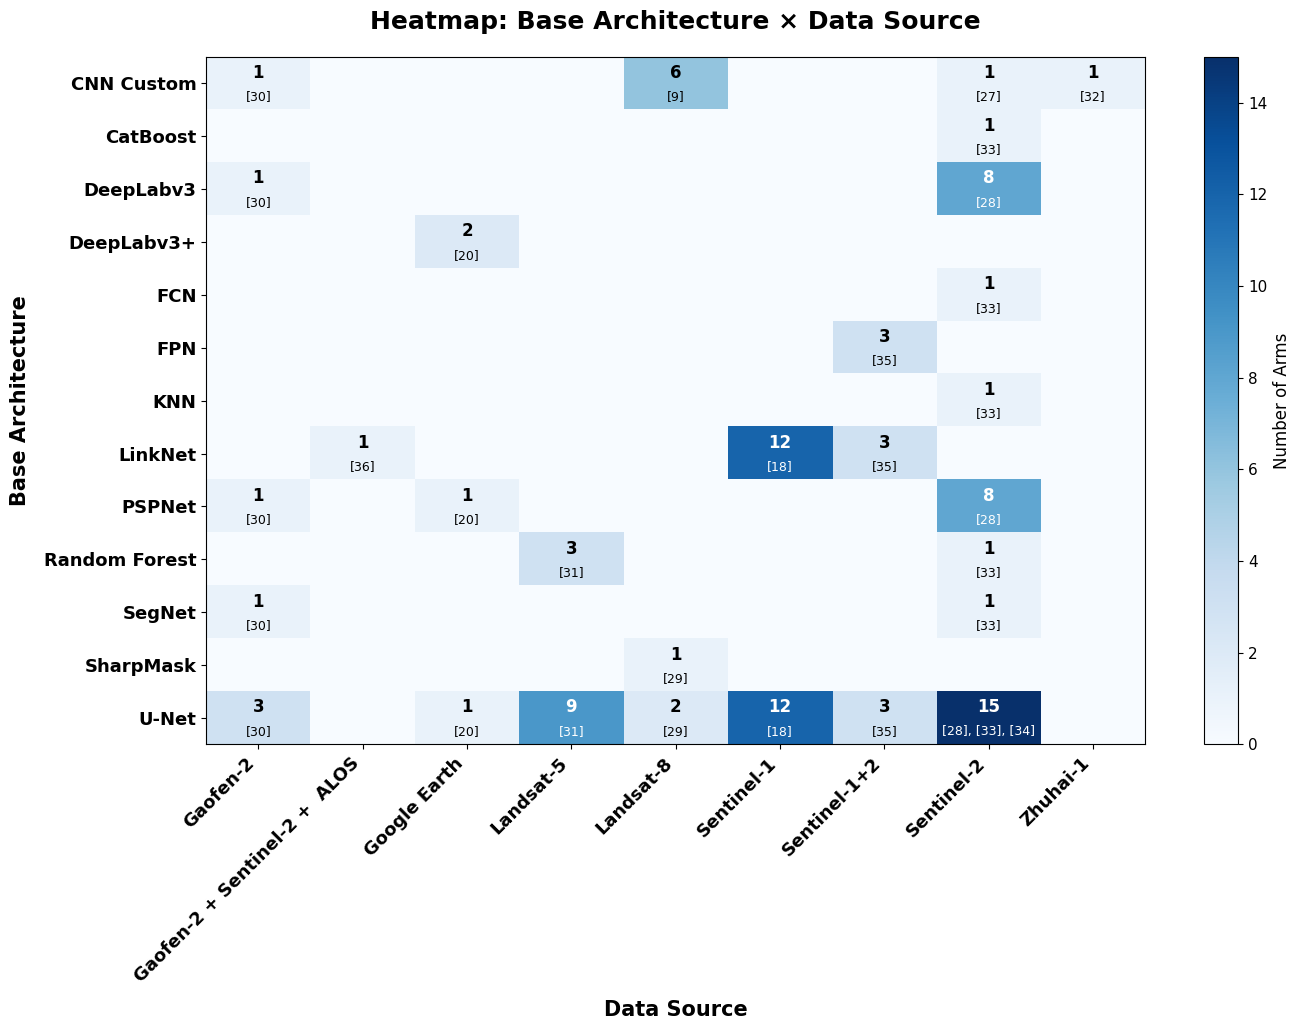

In [22]:
# 1. Check for required columns
req_cols = ["Architecture (base)", "data_source_std", "Study Number"]
missing = [c for c in req_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

# 2. Filter valid rows
df_filtered = df[req_cols].dropna()

# 3. Group study numbers by (Architecture × Data Source)
study_map = (
    df_filtered.groupby(["Architecture (base)", "data_source_std"])["Study Number"]
    .apply(lambda x: ', '.join(map(str, sorted(x.unique()))))
    .unstack(fill_value="")
    .sort_index()
)

# 4. Pivot table: count of arms
pivot = (
    df_filtered.groupby(["Architecture (base)", "data_source_std"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# 5. Plot heatmap
fig_h = max(8, 0.8 * len(pivot))
fig, ax = plt.subplots(figsize=(14, fig_h))

mat = pivot.values
im = ax.imshow(mat, aspect="auto", cmap="Blues")

# Axis ticks
ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=45, ha="right", fontsize=13, fontweight="bold")
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index, fontsize=13, fontweight="bold")

# 6. Annotate cells with counts and study numbers
thr = mat.max() / 2.0 if mat.max() else 0
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        val = mat[i, j]
        studies = study_map.iat[i, j]
        if val > 0:
            color = "white" if val > thr else "black"
            ax.text(j, i - 0.2, str(val), ha="center", va="center",
                    color=color, fontsize=12, fontweight="bold")
            ax.text(j, i + 0.25, f"{studies}", ha="center", va="center",
                    color=color, fontsize=9)

# 7. Colorbar and labels
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Number of Arms", fontsize=12)
cbar.ax.tick_params(labelsize=11)

ax.set_title("Heatmap: Base Architecture × Data Source", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel("Data Source", fontsize=15, fontweight="bold", labelpad=10)
ax.set_ylabel("Base Architecture", fontsize=15, fontweight="bold", labelpad=10)

plt.tight_layout()
save_plot_pdf("heatmap_base_architecture_data_source")
plt.show()


Plot saved to: assets/heatmap_data_source_by_study.pdf


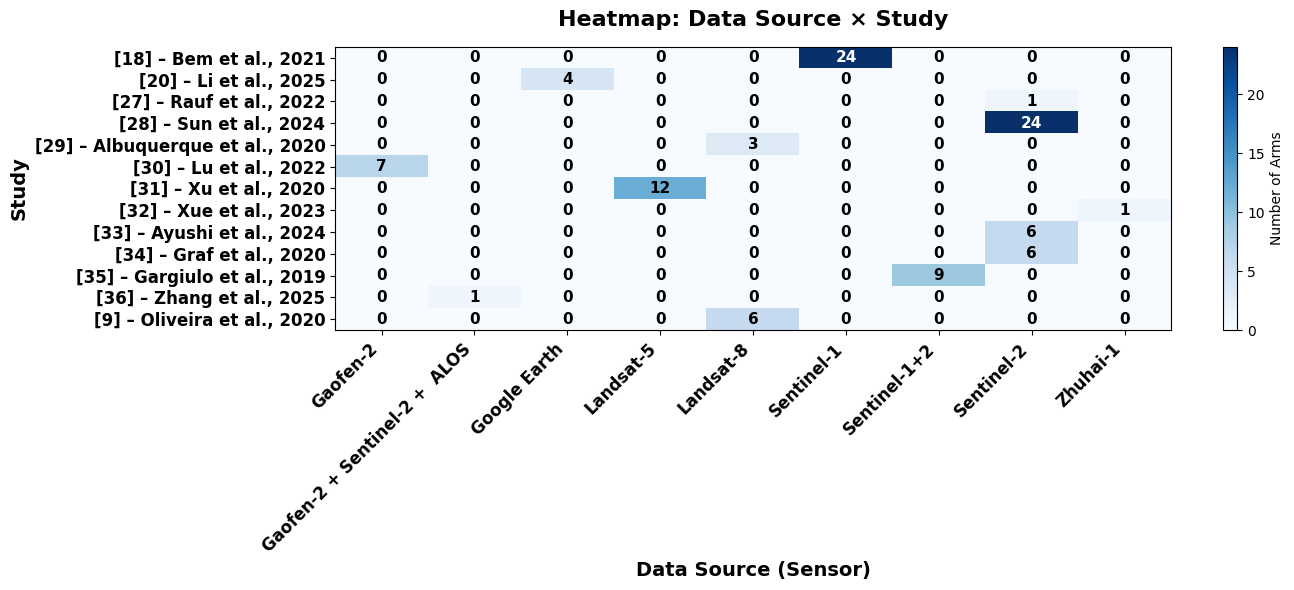

In [23]:
# Check for required columns
required_cols = ["Study ID", "Study Number", "data_source_std"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

# Study label with number and ID
df["Study Label"] = df["Study Number"].astype(str).str.rjust(2, "0") + " – " + df["Study ID"]

# ── Pivot table: count of arms per study × data source
pivot = (
    df.groupby(["Study Label", "data_source_std"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# ── Plot heatmap
fig_height = max(6, 0.35 * len(pivot))
fig, ax = plt.subplots(figsize=(14, fig_height))

data = pivot.values
im = ax.imshow(data, aspect="auto", cmap="Blues")

# Axis labels
ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=45, ha="right", fontsize=12, fontweight="bold")
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index, fontsize=12, fontweight="bold")

# Annotate each cell with values
max_val = data.max() #type: ignore
threshold = max_val / 2.0 if max_val else 0
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        color = "white" if val > threshold else "black"
        ax.text(j, i, str(val), ha="center", va="center", color=color, fontsize=11, fontweight="bold")

# Colorbar and titles
plt.colorbar(im, ax=ax, label="Number of Arms")
ax.set_title("Heatmap: Data Source × Study", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Data Source (Sensor)", fontsize=14, fontweight="bold")
ax.set_ylabel("Study", fontsize=14, fontweight="bold")

plt.tight_layout()
save_plot_pdf("heatmap_data_source_by_study")
plt.show()


/tmp/ipykernel_22706/1781762159.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Data resolution', 'f1_bin'])['Study Number']
/tmp/ipykernel_22706/1781762159.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Data resolution', 'f1_bin'])


Plot saved to: assets/heatmap_resolution_vs_f1_bin.pdf


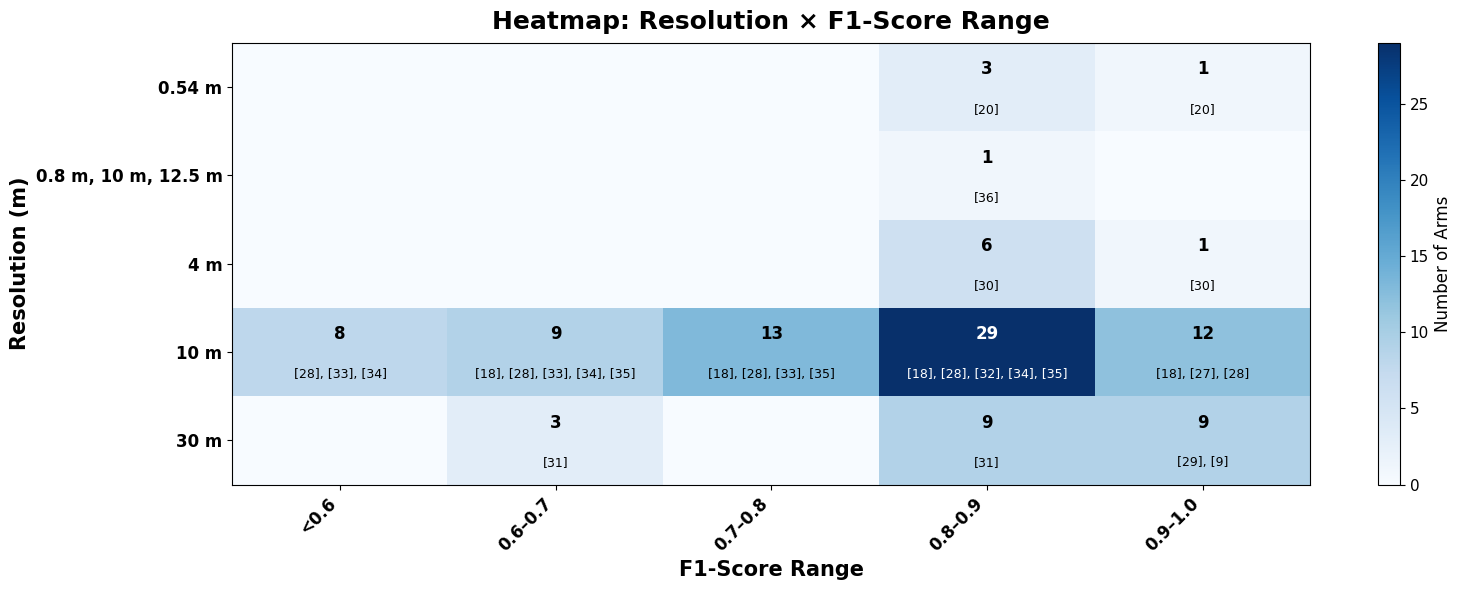

In [24]:
# 1. Check for required columns
req_cols = ['F1-Score', 'Data resolution', 'Study Number']
missing = [c for c in req_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

# 2. Bin F1-score values
f1_bins = [0.0, 0.6, 0.7, 0.8, 0.9, 1.0]
f1_labels = ['<0.6', '0.6–0.7', '0.7–0.8', '0.8–0.9', '0.9–1.0']
df['f1_bin'] = pd.cut(df['F1-Score'], bins=f1_bins, labels=f1_labels, include_lowest=True)

# 3. Group study numbers by resolution × F1 bin
grouped = (
    df.dropna(subset=['f1_bin', 'Data resolution', 'Study Number'])
      .groupby(['Data resolution', 'f1_bin'])['Study Number']
      .apply(lambda x: ', '.join(map(str, sorted(x.unique()))))
      .unstack(fill_value="")
)

# 4. Count number of arms per resolution × F1 bin
pivot = (
    df.dropna(subset=['f1_bin', 'Data resolution'])
      .groupby(['Data resolution', 'f1_bin'])
      .size()
      .unstack(fill_value=0)
)

# 5. Sort resolution values numerically
def get_num(res):
    import re
    m = re.search(r'(\d+(\.\d+)?)', str(res))
    return float(m.group(1)) if m else float('inf')

pivot = pivot.reindex(sorted(pivot.index, key=get_num))
grouped = grouped.reindex(pivot.index)

# 6. Plot heatmap
fig_height = max(6, 0.6 * len(pivot))
fig_width = max(16, 3 * len(pivot.columns))
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

data = pivot.values
im = ax.imshow(data, aspect='auto', cmap='Blues')

ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=12, fontweight='bold')
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index, fontsize=12, fontweight='bold')

# Annotate cells with counts and study numbers
threshold = data.max() / 2.0 if data.max() else 0 #type: ignore
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        studies = grouped.iat[i, j]
        if val > 0:
            color = 'white' if val > threshold else 'black'
            ax.text(j, i - 0.2, str(val), ha='center', va='center',
                    color=color, fontsize=12, fontweight='bold')
            ax.text(j, i + 0.25, f"{studies}", ha='center', va='center',
                    color=color, fontsize=9)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Number of Arms', fontsize=12)
cbar.ax.tick_params(labelsize=11)

ax.set_title('Heatmap: Resolution × F1-Score Range', fontsize=18, fontweight='bold', pad=10)
ax.set_xlabel('F1-Score Range', fontsize=15, fontweight='bold')
ax.set_ylabel('Resolution (m)', fontsize=15, fontweight='bold')

plt.tight_layout()
save_plot_pdf("heatmap_resolution_vs_f1_bin")
plt.show()


Plot saved to: assets/studies_by_country_with_ids_horizontal.pdf


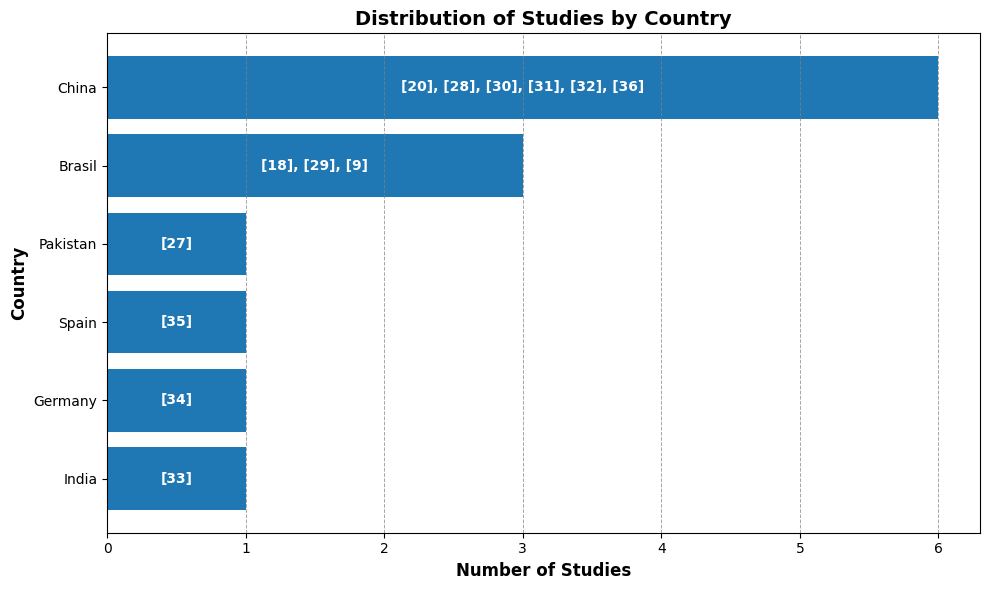

In [25]:
unique_studies = df[['Study Number', 'Country']].drop_duplicates()

# For each country, get the count and the list of Study Numbers
country_group    = unique_studies.groupby('Country')['Study Number']
country_counts   = country_group.count().sort_values()         # ascending order
country_studies  = country_group.apply(lambda nums: sorted(nums)).reindex(country_counts.index)

plt.figure(figsize=(10, 6))

max_count = country_counts.max()
for x in range(1, max_count + 1):
    plt.axvline(x, linestyle='--', color='grey', linewidth=0.7, alpha=0.7)

bars = plt.barh(
    country_counts.index,
    country_counts.values, #type: ignore
)

for bar, studies in zip(bars, country_studies):
    study_labels = ", ".join(str(s) for s in studies)
    plt.text(
        bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        study_labels,
        ha='center', va='center',
        fontsize=10, fontweight='bold',
        color='white'
    )

plt.xlabel('Number of Studies', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Distribution of Studies by Country', fontsize=14, fontweight='bold')
plt.tight_layout()

save_plot_pdf("studies_by_country_with_ids_horizontal")
